In [1]:
import pandas as pd
import os

df = pd.read_csv('data/train.csv')

print(df.head())
print(df.shape)

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [2]:
summary = pd.DataFrame({
    "null_count": df.isnull().sum(),
    "unique_count": df.nunique()
})

pd.set_option("display.max_rows", None)
summary.to_clipboard()
summary

,null_count,unique_count
Id,0,1460
MSSubClass,0,15
MSZoning,0,5
LotFrontage,259,110
LotArea,0,1073
Street,0,2
Alley,1369,2
LotShape,0,4
LandContour,0,4
Utilities,0,2


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def view_average_saleprice(df, col, target_col='SalePrice'):
    """
    Iterates through all categorical/discrete columns and 
    displays the mean SalePrice for each unique value.
    """

    print(f"\n--- Average {target_col} by {col} ---")
    # Grouping and calculating mean, then sorting for better readability
    analysis = df.groupby(col)[target_col].mean().sort_values(ascending=False)
    print(analysis)
    print("-" * 30)

def view_continuous_correlation(df, col1, col2):
    """
    Calculates the Pearson correlation and displays a scatter plot 
    between two continuous variables.
    """
    # Calculate the correlation coefficient
    correlation = df[col1].corr(df[col2])
    
    print(f"Correlation between {col1} and {col2}: {correlation:.4f}")
    
    # Create the visualization
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df, x=col1, y=col2, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    
    plt.title(f'Relationship: {col1} vs {col2} (Corr: {correlation:.4f})')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

In [16]:
view_average_saleprice(df, 'LotShape')


--- Average SalePrice by LotShape ---
LotShape
IR2    239833.365854
IR3    216036.500000
IR1    206101.665289
Reg    164754.818378
Name: SalePrice, dtype: float64
------------------------------


Correlation between LotArea and SalePrice: 0.2638


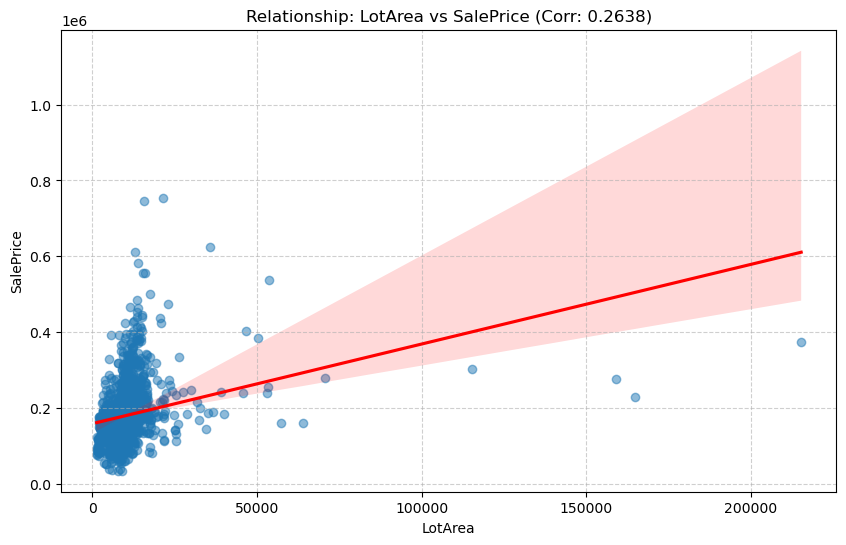

In [14]:
view_continuous_correlation(df, 'LotArea', 'SalePrice')

/tmp/ipykernel_51573/3357378696.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=null_df, x=col, ax=axes[i], palette='viridis', order=null_df[col].value_counts().index)
/tmp/ipykernel_51573/3357378696.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=null_df, x=col, ax=axes[i], palette='viridis', order=null_df[col].value_counts().index)
/tmp/ipykernel_51573/3357378696.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=null_df, x=col, ax=axes[i], palette='viridis', order=null_df[col].value_counts().index)
/tmp/ip

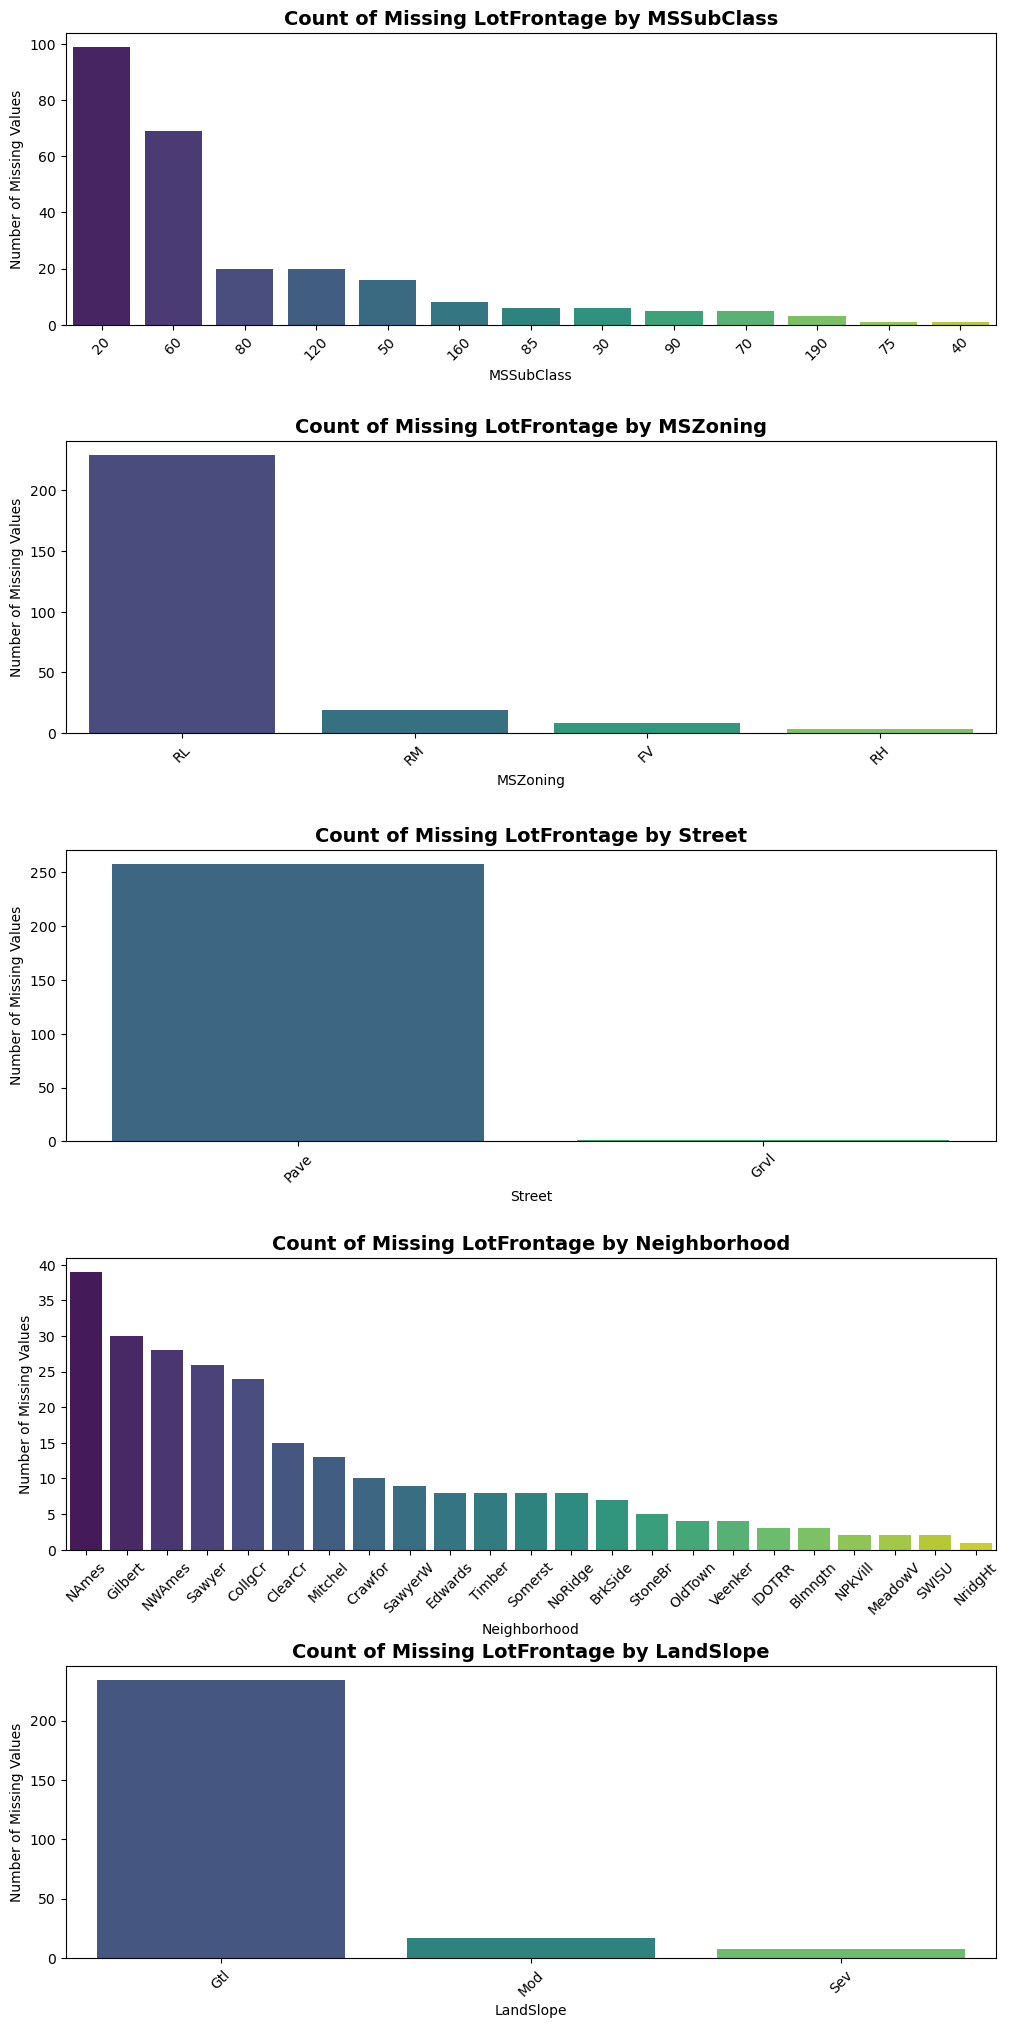

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_null_patterns(df, target_col='LotFrontage', cat_cols=None):
    if cat_cols is None:
        cat_cols = ['MSSubClass', 'MSZoning', 'Street', 'Neighborhood', 'LandSlope']
    
    # Filter for rows where LotFrontage is missing
    null_df = df[df[target_col].isnull()]
    
    # Set up the plotting grid
    fig, axes = plt.subplots(len(cat_cols), 1, figsize=(12, 5 * len(cat_cols)))
    fig.subplots_adjust(hspace=0.4)

    for i, col in enumerate(cat_cols):
        # Count plot showing the distribution of nulls
        sns.countplot(data=null_df, x=col, ax=axes[i], palette='viridis', order=null_df[col].value_counts().index)
        
        axes[i].set_title(f'Count of Missing {target_col} by {col}', fontsize=14, fontweight='bold')
        axes[i].set_ylabel('Number of Missing Values')
        axes[i].tick_params(axis='x', rotation=45)

    plt.show()

# Run the function
plot_null_patterns(df)

In [5]:
# Find rows where one is null but the other isn't
inconsistent = df[df['MasVnrType'].isnull() != df['MasVnrArea'].isnull()]
print(f"Number of inconsistent rows: {len(inconsistent)}")

# Specifically check if there are null types with an Area > 0
type_null_with_area = df[df['MasVnrType'].isnull() & (df['MasVnrArea'] > 0)]
print(type_null_with_area[['MasVnrType', 'MasVnrArea']])

Number of inconsistent rows: 864
     MasVnrType  MasVnrArea
624         NaN       288.0
773         NaN         1.0
1230        NaN         1.0
1300        NaN       344.0
1334        NaN       312.0
